In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
Transactions=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Transactions')

In [3]:
Transactions=Transactions[['User_id','Order_id','DATE','GMV','Service Group','MerchantID']]


In [4]:
Transactions['User_id']=Transactions['User_id'].astype(str)
Transactions['Order_id']=Transactions['Order_id'].astype(str)
Transactions['MerchantID']=Transactions['MerchantID'].astype(str)

In [5]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID
0,61386143,8733622706,2021-01-01,100000,marketplace,37
1,48453125,8726857991,2021-01-01,5000,supermarket,9
2,49921027,8737326894,2021-01-01,106600,supermarket,9
3,46022523,8732579078,2021-01-01,270000,supermarket,9
4,44014594,8725567343,2021-01-01,68000,cvs,8


In [6]:
Total_GMV=Transactions['GMV'].sum()
print('Tổng tiền :{:,.0f}'.format(Total_GMV)+' VND')


Tổng tiền :7,561,407,694 VND


In [7]:
Loyalty_Points=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Loyalty Points')

In [8]:
Loyalty_Points

,Service Group,Point Mechanism,Maximum Point Per Trans
0,supermarket,1 points/1000VND GMV,500 points
1,data,10 points/1000VND GMV,1000 points
2,cvs,1 points/1000VND GMV,300 points
3,marketplace,1 points/1000VND GMV,500 points
4,Coffee chains and Milk tea,1 points/1000VND GMV,500 points
5,Offline Beverage,1 points/1000VND GMV,300 points


In [9]:
Loyalty_Benefits=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Loyalty benefits')

In [10]:
Loyalty_Benefits['Class ID']=Loyalty_Benefits['Class ID'].astype(str)
Loyalty_Benefits

,Class ID,Group,%cashback
0,2,cvs,5
1,2,Offline Beverage,5
2,2,data,5
3,3,cvs,7
4,3,Offline Beverage,7
5,3,data,7
6,3,marketplace,2
7,3,supermarket,2
8,4,cvs,12
9,4,Offline Beverage,12


In [11]:
# Loyalty_Benefits.dtypes

# Part 1

1,

In [12]:
new_Loyalty_Points=Loyalty_Points[['Service Group','Maximum Point Per Trans']]
new_Loyalty_Points['Maximum Point Per Trans']=new_Loyalty_Points['Maximum Point Per Trans'].apply(lambda x: x.split(' ')[0])
Transactions=Transactions.merge(new_Loyalty_Points,on='Service Group',how='left')

C:\Users\ACER\AppData\Local\Temp\ipykernel_29680\1909542948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Loyalty_Points['Maximum Point Per Trans']=new_Loyalty_Points['Maximum Point Per Trans'].apply(lambda x: x.split(' ')[0])


In [13]:
Transactions['Loyalty Points 1'] = Transactions.apply(lambda row: int(row['GMV'] / 1000 * 10) if row['Service Group'] == 'data'
                                                       else int(row['GMV'] / 1000 * 1), axis=1)


In [14]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Maximum Point Per Trans,Loyalty Points 1
0,61386143,8733622706,2021-01-01,100000,marketplace,37,500,100
1,48453125,8726857991,2021-01-01,5000,supermarket,9,500,5
2,49921027,8737326894,2021-01-01,106600,supermarket,9,500,106
3,46022523,8732579078,2021-01-01,270000,supermarket,9,500,270
4,44014594,8725567343,2021-01-01,68000,cvs,8,300,68


In [15]:
Transactions['Maximum Point Per Trans']=Transactions['Maximum Point Per Trans'].astype(int)

In [16]:
Transactions['Loyalty Points']=Transactions.apply(lambda row : row['Loyalty Points 1'] if row['Loyalty Points 1'] < row['Maximum Point Per Trans'] 
                                                  else row['Maximum Point Per Trans'],axis=1)

In [17]:
Transactions.drop(['Maximum Point Per Trans','Loyalty Points 1'],axis=1,inplace=True)

In [18]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points
0,61386143,8733622706,2021-01-01,100000,marketplace,37,100
1,48453125,8726857991,2021-01-01,5000,supermarket,9,5
2,49921027,8737326894,2021-01-01,106600,supermarket,9,106
3,46022523,8732579078,2021-01-01,270000,supermarket,9,270
4,44014594,8725567343,2021-01-01,68000,cvs,8,68


In [19]:
# x=input('nhập date (yyyy-mm-dd):')
# current_date = datetime.datetime.strptime(x,'%Y-%m-%d')
current_date = datetime.datetime(2022,3,31)
days_to_reset = 30
reset_date = current_date - datetime.timedelta(days=days_to_reset)
# print(reset_date)
Transactions.loc[Transactions['DATE'] < reset_date , 'Loyalty Points'] = 0


In [20]:
Loyalty_Ranking=Transactions.groupby('User_id')['Loyalty Points'].sum().reset_index()

In [21]:
Loyalty_Ranking.head()

,User_id,Loyalty Points
0,10056218,880
1,10071920,0
2,10093330,0
3,10154027,0
4,10156282,100


In [22]:
Loyalty_Ranking.drop(Loyalty_Ranking[Loyalty_Ranking['Loyalty Points'] == 0].index, inplace=True)


In [23]:
Loyalty_Ranking['Rank_name']=Loyalty_Ranking['Loyalty Points'].apply(lambda x: 'DIAMOND' if x>=5000 
                                                                     else('GOLD' if x<5000 and x>=2000 
                                                                          else('SILVER' if x<2000 and x >=1000 
                                                                               else 'STANDARD')))

In [24]:
Loyalty_Ranking['Class ID']=Loyalty_Ranking['Rank_name'].apply(lambda x : 1 if x=='STANDARD' 
                                                               else(2 if x=='SILVER' 
                                                                    else(3 if x=='GOLD' 
                                                                         else 4)))

In [25]:
Loyalty_Ranking.rename(columns={'Loyalty Points':'Calculated_points'},inplace=True)

In [26]:
Loyalty_Ranking.head()

,User_id,Calculated_points,Rank_name,Class ID
0,10056218,880,STANDARD,1
4,10156282,100,STANDARD,1
6,10184635,4000,GOLD,3
7,1018832,2130,GOLD,3
8,10247812,150,STANDARD,1


In [27]:
Loyalty_Ranking['Rank_name'].value_counts()

STANDARD    1512
SILVER       301
GOLD         125
DIAMOND       14
Name: Rank_name, dtype: int64

In [28]:
x=Loyalty_Ranking['Rank_name'].value_counts()['GOLD']
print('Vào cuối tháng 3 năm 2022, có {} người dùng đạt được thứ hạng Vàng'.format(x))

Vào cuối tháng 3 năm 2022, có 125 người dùng đạt được thứ hạng Vàng


In [29]:
# Loyalty_Ranking.dtypes

2,

In [30]:
Loyalty_Ranking['Class ID'] = Loyalty_Ranking['Class ID'].astype(str)

In [31]:
Transactions.drop(Transactions[Transactions['DATE']<'2022-01-01'].index,inplace=True)

In [32]:
Transactions=Transactions.merge(Loyalty_Ranking[['User_id','Class ID']],on='User_id',how='left')

In [33]:
# Transactions.dtypes

In [34]:
Transactions['Class ID'] = Transactions['Class ID'].fillna('1')


In [35]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points,Class ID
0,45715492,19502954801,2022-01-01,41400,supermarket,25,0,3
1,41720789,19492487660,2022-01-01,205000,cvs,28,0,2
2,55200938,19491373621,2022-01-01,237000,cvs,28,0,4
3,17144057,19485025779,2022-01-01,17000,cvs,28,0,1
4,46410460,19497349350,2022-01-01,340000,marketplace,37,0,1


In [36]:
# Transactions.dtypes

In [37]:
Transactions.drop(Transactions[Transactions['Class ID']=='1'].index,inplace=True)

In [38]:
Transactions = pd.merge(Transactions, Loyalty_Benefits, left_on=['Class ID', 'Service Group'], right_on=['Class ID', 'Group'], how='left')


In [39]:
Transactions.drop(Transactions[Transactions['Group'].isnull()].index,inplace=True)

In [40]:
Transactions['%cashback']=Transactions['%cashback'].astype(int)


In [41]:
Transactions['total_cash_back']=(Transactions['GMV']*Transactions['%cashback'])/100

In [42]:
Transactions['total_cash_back']=Transactions['total_cash_back'].astype(int)
Transactions.drop(['Class ID','Group'],axis=1,inplace=True)

In [43]:
Transactions['total_cash_back']=Transactions['total_cash_back'].apply(lambda x : 10000 if x >10000 else x)

In [44]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points,%cashback,total_cash_back
0,45715492,19502954801,2022-01-01,41400,supermarket,25,0,2,828
1,41720789,19492487660,2022-01-01,205000,cvs,28,0,5,10000
2,55200938,19491373621,2022-01-01,237000,cvs,28,0,12,10000
4,21752575,19488038888,2022-01-01,499000,marketplace,37,0,2,9980
5,40418705,19492658771,2022-01-01,138000,marketplace,37,0,2,2760


In [45]:
condition = (Transactions['DATE'].dt.year == 2022) & (Transactions['DATE'].dt.month == 2)
total_cashback_feb_2022 = Transactions.loc[condition, 'total_cash_back'].sum()
print('Tổng chi phí hoàn tiền vào tháng 2 năm 2022:{:,.0f}'.format(total_cashback_feb_2022)+'VND')

Tổng chi phí hoàn tiền vào tháng 2 năm 2022:4,831,497VND


In [46]:
Transactions.to_csv('Cashback.csv',index=False)

3,

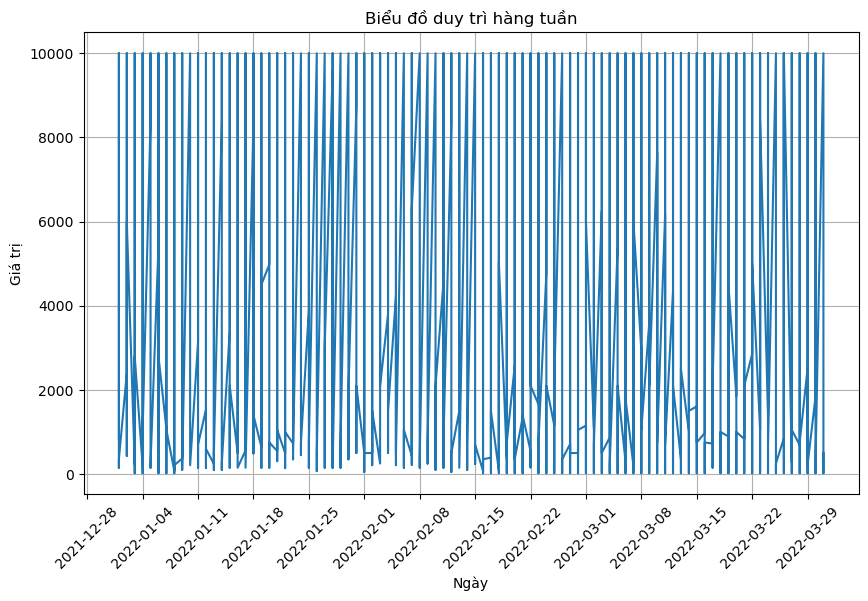

In [47]:
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-03-31')
# end_date = pd.to_datetime(datetime.datetime.now().date())
filtered_data = Transactions.loc[(Transactions['DATE'] >= start_date) & (Transactions['DATE'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DATE'], filtered_data['total_cash_back'])
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Biểu đồ duy trì hàng tuần')
plt.xticks(rotation=45)
plt.grid(True)

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()



# Part 2

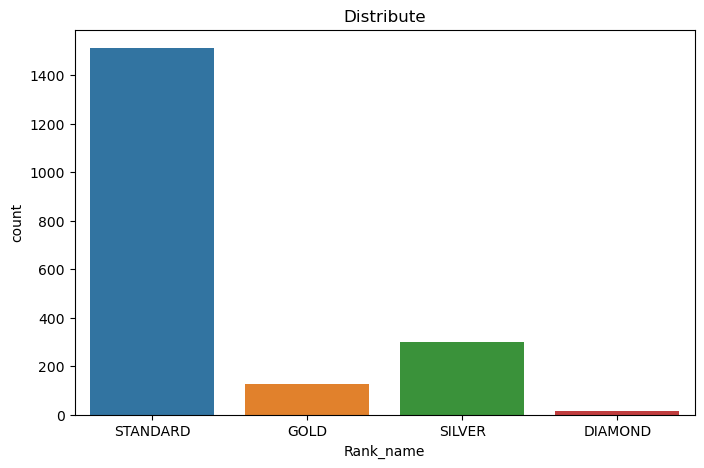

In [48]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(data=Loyalty_Ranking,x='Rank_name')
ax.set(title="Distribute");

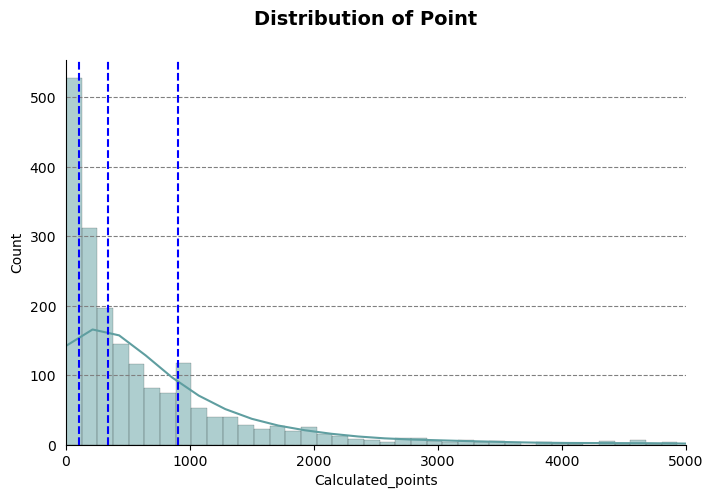

In [49]:
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.histplot(data=Loyalty_Ranking, x=Loyalty_Ranking['Calculated_points'], kde=True, color='#5f9ea0')
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 25), color="blue", linestyle="--")
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 50), color="blue", linestyle="--")
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 75), color="blue", linestyle="--")
plt.xlim(0, 5000)

# vẽ các đường lưới ngang trên trục y của đồ thị.
ax.yaxis.grid(color='gray', linestyle='dashed')
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở  trục y
ax.tick_params(left=False) 

plt.suptitle('Distribution of Point', fontweight='bold', size=14, horizontalalignment='center')
plt.show();

In [50]:
Loyalty_Ranking['Calculated_points'].describe()

count     1952.000000
mean       728.445697
std       1755.278325
min          1.000000
25%        108.000000
50%        337.000000
75%        900.000000
max      42600.000000
Name: Calculated_points, dtype: float64

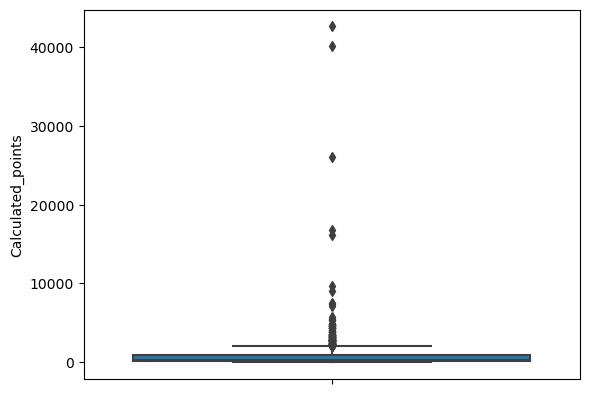

In [51]:
sns.boxplot(y=Loyalty_Ranking['Calculated_points']);